# IS6713 Classification Project
### Team: Python is Fun
### Members:
### - Stephen Garcia (wqr974)
### - Carlos Araujo (vps958)
### - Erica Rodriguez (p91869)

## Annotation and Modeling Experiment
This project is a comprehensive analysis of data annotation techniques and their impact on model performance. This project has two distinct parts: the first part focuses on data annotation, while the second part delves into model training and evaluation. The goal is to understand how different annotation methods affect the performance of machine learning models in various tasks.
## Part 1: Data Annotation
We created annotation guidelines and extracted a dataset of one thousand reddit posts.  The dataset was given to two groups for annotation: Group A and Group B. Each group was tasked with annotating the posts based on specific criteria. We chose Technology Related vs Non-Technology related posts and Political vs Non-Political posts.  The annotations were then compared to assess the consistency and reliability of the two groups' annotations.  We also calculated the inter-annotator agreement to evaluate the level of agreement between the two groups. The inter-annotator agreement was calculated using Cohen's Kappa statistic.

### Gold Standard Dataset
The gold standard dataset was created by combining the annotations from both groups. The final dataset consists of 1000 reddit posts, each annotated with a label indicating its category. The categories are as follows:
- Category 1: Technology Related vs Non-Technology Related
- Category 2: Politics Related vs Non-Politics Related

## Part 2: Model Training and Evaluation
In this part, we trained and evaluated various machine learning models and techniques using the annotated dataset. The models were trained on the gold standard dataset and evaluated based on their performance in classifying the reddit posts into the specified categories.
### Models Used
- Lexicon-based Model: A model that uses a lexicon of words to classify the posts based on their content.
- LinearSVC (BoW Model): A supervised learning model that uses a bag-of-words (BoW) representation, word frequency vectors, to learn patterns and classify posts.
- BoW with Feature Engineering: Enhanced versions of the BoW model that incorporate additional selected features (number of exclamation points, count of capitalized words) alongside word frequencies to improve classification performance.



## Code Implementation
### Class Definition
The first code block defined a class called LexiconClassifier. This class is designed to determine whether a given text has representations of technology or politics. The class uses a lexicon-based approach, where it checks for the presence of specific keywords related to technology and politics in the input text.

In [17]:
class LexiconClassifier:
    def __init__(self, lexicon_path):
        """
        Initialize a lexicon-based classifier.
        Automatically separates phrases (multi-word terms) and single-word terms.
        """
        self.word_set = set()
        self.phrase_set = set()

        with open(lexicon_path, encoding='utf-8') as file:
            for line in file:
                term = line.strip().lower()
                if ' ' in term:
                    self.phrase_set.add(term)
                else:
                    self.word_set.add(term)

    def count_matches(self, sentence):
        """
        Count how many lexicon words/phrases are present in a sentence.
        
        Parameters:
            sentence (str): Input text.
        
        Returns:
            int: Number of matched lexicon entries.
        """
        sentence = sentence.lower()
        words = sentence.split()

        count = sum(1 for word in words if word in self.word_set)
        count += sum(1 for phrase in self.phrase_set if phrase in sentence)

        return count

    def has_match(self, sentence):
        """
        Check if any lexicon word or phrase is present in the sentence.
        
        Parameters:
            sentence (str): Input text.
        
        Returns:
            bool: True if a match is found, False otherwise.
        """
        return self.count_matches(sentence) > 0

### Step 2: Split the Data
The second code block splits the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance. The split is done using a 80-20 ratio, meaning that 80% of the data is used for training and 20% for testing.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(file_path, text_col, label_col, test_size=0.2, random_state=42):
    """
    Loads a CSV file, extracts text and label columns, and splits the data into training and test sets. 
    Instead of using csv.reader, I am using pandas to handle the CSV file, which is more comfortable for me 
    and more efficient.

    Functional Parameters:
        file_path (str): Path to the CSV file.
        text_col (str): Name of the column containing text data.
        label_col (str): Name of the column containing labels (numeric or categorical).
        test_size (float): Percent of data to reserve for testing.
        random_state (int): Reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Lists for modeling.
    """
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')

    X_all = df[text_col].astype(str).tolist()
    y_all = df[label_col].tolist()

    return train_test_split(X_all, y_all, test_size=test_size, random_state=random_state)


def count_cap_words(text):
    """
    Count the number of capitalized words in a given text.

    Functional Parameters:
        file_path (text): String to analyze.

    Returns:
        count of capitalized words in the text.
    """
    return sum(1 for word in text.split() if word.isupper())

def count_exclamations(text):
    """
    Count the number of exclamation marks in a given text.

    Functional Parameters:
        file_path (text): String to analyze.

    Returns:
        count of exclamation marks in the text.
    """    
    return text.count('!')


In [22]:
# Extract Separate Datasets for Testing and training usage:
X_txt_train, X_txt_test, y_train, y_test = load_and_split_data(
    file_path='IS6713_Proj_Tech_DS.csv',
    text_col='Comment',
    label_col='Golden_Dataset_Label'
)

# Check the sizes of the datasets
print("Train size:", len(X_txt_train))
print("Test size:", len(X_txt_test))
print("Sample train data:", X_txt_train[:5])
print("Sample train labels:", y_train[:5])

Train size: 800
Test size: 200
Sample train data: ["Don't know. Call center work is probably always going to suck (and still have high demand despite stressful work environments &amp; automated tech) but at least somebody is considering ways to make it suck less. I was just saying that it's different than what companies like GM Financial threw up last year and could be a next generation trend.", "Oops, my bad. I've had a few friends go to DO and they all wfh. Assumed all the tech roles were wfh.", 'It\'s typically going to depend on the river on any given day where/how it\'s flowing.  The tube companies will generally know where to put you in based on how long you want to float.  I typically go to Rockin\' R myself, often at River Road Icehouse instead of their flagship spot in Gruene, but only because I don\'t like the crowded lines of people around me.  You have to wait just as long because you typically need an extra ride, but that\'s just me.  There\'s several outfitters though.  T

### Step 3: Training and Evaluation of the Lexicon-based Model
The LexiconClassifier class is trained on a dataset of reddit posts, where each post is labeled as either technology-related or politics-related. The model uses a lexicon of keywords to classify the posts based on their content. The training process involves iterating through the dataset and checking for the presence of keywords in each post. The model then calculates the accuracy of its predictions by comparing them to the actual labels in the dataset.

In [23]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create a lexicon-based classifier
tech_lex = LexiconClassifier('technology-words.txt')
lex_test_preds = []

# Predict the test set using the lexicon-based classifier
for sentence in X_txt_test:
    pred = tech_lex.has_match(sentence)
    lex_test_preds.append(pred)

# View the first 5 predictions
num_tweets = 0
for text, lex_pred, y  in zip(X_txt_test, lex_test_preds, y_test):
    print("Tweet: {}".format(text))
    print("Ground-Truth Class: {}".format(y))
    print("Lexicon Model Prediction: {}".format(lex_pred))
    print()
    num_tweets += 1
    if num_tweets == 5:
        break    

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, lex_test_preds, average='binary')
recall = recall_score(y_test, lex_test_preds, average='binary')
f1 = f1_score(y_test, lex_test_preds, average='binary')

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: 'technology-words.txt'

### Step 4: Training and Evaluation of the LinearSVC Model (BOW Only)
The LinearSVC model is a linear classifier that uses a vector space representation of the posts to classify them. The model is trained on the same dataset as the LexiconClassifier, but it uses a different approach to classify the posts. The training process involves creating a vector representation of each post and using a linear classifier to predict its label. The model's performance is evaluated by comparing its predictions to the actual labels in the dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import scipy.sparse as sp
from scipy.sparse import hstack
np.random.seed(42)
import random
random.seed(42)

vectorizer = CountVectorizer()

# This will be the matrix from CountVectorizer
X_train = vectorizer.fit_transform(X_txt_train) 
X_test = vectorizer.transform(X_txt_test)

# Initialize the classifier LinearSVC 
svc = LinearSVC(max_iter=1000, random_state=42)

# Create the params with the C values
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
clf = GridSearchCV(svc, params, scoring='f1_macro', cv=5)

# "fit" the model  on X_train
clf.fit(X_train, y_train)

# Get the score from the GridSearchCV "best score"
validation_score = clf.best_score_ 
print("Validation F1: {:.4f}".format(validation_score))

# "predict" on X_test 
svm_test_predictions = clf.predict(X_test) 

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, svm_test_predictions, average='macro') 
mi_precision = precision_score(y_test, svm_test_predictions, average='micro') 
ma_recall = recall_score(y_test, svm_test_predictions, average='macro')
mi_recall = recall_score(y_test, svm_test_predictions, average='micro')
ma_f1 = f1_score(y_test, svm_test_predictions, average='macro')
mi_f1 = f1_score(y_test, svm_test_predictions, average='micro')

# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))


Validation F1: 0.6825
Macro Precision: 0.6765
Micro Precision: 0.8250
Macro Recall: 0.6989
Micro Recall: 0.8250
Macro F1: 0.6863
Micro F1: 0.8250


### Step 5: Training and Evaluation of the LinearSVC Model (BOW + Feature Engineering - Exclamation Marks) 
The BOW model is a bag-of-words model that uses the frequency of words in the posts to classify them. The model is trained on the same dataset as the LexiconClassifier and LinearVC models, but it uses a different approach to classify the posts. The training process involves creating a bag-of-words representation of each post and using a classifier to predict its label. The model's performance is evaluated by comparing its predictions to the actual labels in the dataset.  Furthermore, we are adding in a feature engineering model that will use exclamation marks as a feature to classify the posts. The model is trained on the same dataset as the other models, but it uses a different approach to classify the posts. The training process involves creating a feature representation of each post based on the presence of exclamation marks and using a classifier to predict its label. The model's performance is evaluated by comparing its predictions to the actual labels in the dataset.

In [ ]:
# BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_txt_train)
X_test_bow = vectorizer.transform(X_txt_test)

# Lexicon match count
X_train_lex = np.array([tech_lex.count_matches(text) for text in X_txt_train]).reshape(-1, 1)
X_test_lex = np.array([tech_lex.count_matches(text) for text in X_txt_test]).reshape(-1, 1)


X_train_excl = np.array([count_exclamations(text) for text in X_txt_train]).reshape(-1, 1)
X_test_excl = np.array([count_exclamations(text) for text in X_txt_test]).reshape(-1, 1)

# Combine all features
X_train_combined = hstack([X_train_bow, X_train_lex, X_train_excl])
X_test_combined = hstack([X_test_bow, X_test_lex, X_test_excl])

clf.fit(X_train_combined, y_train)

validation_score = clf.best_score_
print("Validation F1: {:.4f}".format(validation_score))

y_pred = clf.predict(X_test_combined)

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, y_pred, average='macro')
ma_recall = recall_score(y_test, y_pred, average='macro')
ma_f1 = f1_score(y_test, y_pred, average='macro')
mi_precision = precision_score(y_test, y_pred, average='micro')
mi_recall = recall_score(y_test, y_pred, average='micro')
mi_f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))

NameError: name 'tech_lex' is not defined

### Step 6: Training and Evaluation of the LinearSVC Model (BOW + Feature Engineering - Capitalization) 
We are continuing our efforts to try and enahnce the model with feature engineering.  In this section we are using capital words to enhance the model.

In [ ]:
# BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_txt_train)
X_test_bow = vectorizer.transform(X_txt_test)

# Lexicon match count
X_train_lex = np.array([tech_lex.count_matches(text) for text in X_txt_train]).reshape(-1, 1)
X_test_lex = np.array([tech_lex.count_matches(text) for text in X_txt_test]).reshape(-1, 1)


X_train_cap = np.array([count_cap_words(text) for text in X_txt_train]).reshape(-1, 1)
X_test_cap = np.array([count_cap_words(text) for text in X_txt_test]).reshape(-1, 1)

# Combine all features
X_train_combined = hstack([X_train_bow, X_train_lex, X_train_cap])
X_test_combined = hstack([X_test_bow, X_test_lex, X_test_cap])

clf.fit(X_train_combined, y_train)

validation_score = clf.best_score_
print("Validation F1: {:.4f}".format(validation_score))

y_pred = clf.predict(X_test_combined)

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, y_pred, average='macro')
ma_recall = recall_score(y_test, y_pred, average='macro')
ma_f1 = f1_score(y_test, y_pred, average='macro')
mi_precision = precision_score(y_test, y_pred, average='micro')
mi_recall = recall_score(y_test, y_pred, average='micro')
mi_f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))


Validation F1: 0.6922
Macro Precision: 0.7000
Micro Precision: 0.8350
Macro Recall: 0.7443
Micro Recall: 0.8350
Macro F1: 0.7175
Micro F1: 0.8350


### Technology Classification – Performance Summary

| Model                   | Val F1  | Macro Precision | Macro Recall | Macro F1 | Micro Precision | Micro Recall | Micro F1 |
|------------------------|---------|------------------|---------------|----------|------------------|---------------|----------|
| **Lexicon-Based**      | —       | 0.9739           | 0.6627        | 0.7887   | —                | —             | —        |
| **BoW (LinearSVC)**    | 0.6825  | 0.6765           | 0.6989        | 0.6863   | 0.8250           | 0.8250        | 0.8250   |
| **BoW + Exclamation**  | 0.6922  | 0.6904           | 0.7282        | 0.7056   | 0.8300           | 0.8300        | 0.8300   |
| **BoW + Caps**         | 0.6922  | 0.7000           | 0.7443        | 0.7175   | 0.8350           | 0.8350        | 0.8350   |


#### Notes:
- The **lexicon model** delivered the highest precision but lower recall.  It is dependent on the lexicon and may not generalize well to unseen data.
- The **BoW + Capitalized Words** model had the best overall F1 score.
- Adding cues (like `!` or capitalized words) improved classification over BoW alone.

### Step 7: Error Analysis

<Figure size 600x400 with 0 Axes>

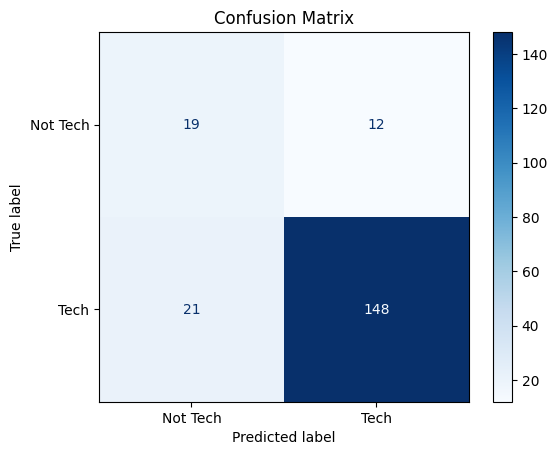

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Tech', 'Tech'])

# Plot it
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Step 8: Export Results

In [ ]:
df_output = pd.DataFrame({
    "comment": X_txt_test,
    "gold_label": y_test,
    "prediction": y_pred
})

# Export to CSV
df_output.to_csv("IS6713_Proj_Final_Predictions_Tech.csv", index=False)
print("CSV file saved: IS6713_Proj_Final_Predictions_Tech.csv")

CSV file saved: IS6713_Proj_Final_Predictions_Tech.csv


## Political vs Non Political Classification
We will repeat the process of training and evaluating the models, but this time on a dataset of political posts.  The goal is to understand how the models perform on a different dataset and whether the results are consistent with the previous analysis. The models will be trained and evaluated using the same approach as with the technology posts. The performance of the models will be compared to assess their effectiveness in classifying political posts.

In [ ]:
# Extract Separate Datasets for Testing and training usage:
X_txt_train, X_txt_test, y_train, y_test = load_and_split_data(
    file_path='IS6713_Proj_Pol_DS.csv',
    text_col='Comment',
    label_col='Golden_Dataset_Label'
)

# Check the sizes of the datasets
print("Train size:", len(X_txt_train))
print("Test size:", len(X_txt_test))
print("Sample train data:", X_txt_train[:5])
print("Sample train labels:", y_train[:5])

Train size: 800
Test size: 200
Sample train data: ["Don't know. Call center work is probably always going to suck (and still have high demand despite stressful work environments &amp; automated tech) but at least somebody is considering ways to make it suck less. I was just saying that it's different than what companies like GM Financial threw up last year and could be a next generation trend.", "Oops, my bad. I've had a few friends go to DO and they all wfh. Assumed all the tech roles were wfh.", 'It\'s typically going to depend on the river on any given day where/how it\'s flowing.  The tube companies will generally know where to put you in based on how long you want to float.  I typically go to Rockin\' R myself, often at River Road Icehouse instead of their flagship spot in Gruene, but only because I don\'t like the crowded lines of people around me.  You have to wait just as long because you typically need an extra ride, but that\'s just me.  There\'s several outfitters though.  T

## Lexicon-based Model

In [ ]:
tech_lex = LexiconClassifier('political-words.txt')
lex_test_preds = []

for sentence in X_txt_test:
    pred = tech_lex.has_match(sentence)
    lex_test_preds.append(pred)

num_tweets = 0
for text, lex_pred, y  in zip(X_txt_test, lex_test_preds, y_test):
    print("Tweet: {}".format(text))
    print("Ground-Truth Class: {}".format(y))
    print("Lexicon Model Prediction: {}".format(lex_pred))
    print()
    num_tweets += 1
    if num_tweets == 5:
        break    

precision = precision_score(y_test, lex_test_preds, average='binary')
recall = recall_score(y_test, lex_test_preds, average='binary')
f1 = f1_score(y_test, lex_test_preds, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Tweet: The actual reason behind *why* is that Texas doesn't limit liability as much as other states particularly when it comes to things like 18 wheeler accidents. In fact, a case in Corpus recently set the largest personal injury verdict record by awarding the plaintiff $301 billion. These sums often get overturned but none-the-less, it's very lucrative to be a personal injury attorney here. 

source: work in tech related to texas insurance markets
Ground-Truth Class: 0
Lexicon Model Prediction: False

Tweet: [Here's one.](https://www.facebook.com/events/410336432484902/)
Ground-Truth Class: 0
Lexicon Model Prediction: False

Tweet: Reason I like Waze:  
  
- Road Closures (Not all of them, but more than GMaps, as GMaps gets its closure info from Waze)
- Updates are volunteer managed
  - More accurate maps given lots of changing highways due to construction
  - Additions like Parking Lot Roads or New neighborhoods can be live in the app in as little as 18 hours. 
- Similar or Faster r

### Bag-of-Words Model (BoW)

In [ ]:
np.random.seed(42)
import random
random.seed(42)

vectorizer = CountVectorizer()

# This will be the matrix from CountVectorizer
X_train = vectorizer.fit_transform(X_txt_train) 
X_test = vectorizer.transform(X_txt_test)

# Initialize the classifier LinearSVC 
svc = LinearSVC(max_iter=1000, random_state=42)

# Create the params with the C values
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
clf = GridSearchCV(svc, params, scoring='f1_macro', cv=5)

# "fit" the model  on X_train
clf.fit(X_train, y_train)

# Get the score from the GridSearchCV "best score"
validation_score = clf.best_score_ 
print("Validation F1: {:.4f}".format(validation_score))

# "predict" on X_test 
svm_test_predictions = clf.predict(X_test) 

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, svm_test_predictions, average='macro') 
mi_precision = precision_score(y_test, svm_test_predictions, average='micro') 
ma_recall = recall_score(y_test, svm_test_predictions, average='macro')
mi_recall = recall_score(y_test, svm_test_predictions, average='micro')
ma_f1 = f1_score(y_test, svm_test_predictions, average='macro')
mi_f1 = f1_score(y_test, svm_test_predictions, average='micro')

# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))



Validation F1: 0.6090
Macro Precision: 0.8444
Micro Precision: 0.9350
Macro Recall: 0.5973
Micro Recall: 0.9350
Macro F1: 0.6408
Micro F1: 0.9350


### Bag-of-Words Model (BoW) with Feature Engineering - Exclamation Marks

In [ ]:
# BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_txt_train)
X_test_bow = vectorizer.transform(X_txt_test)

# Lexicon match count
X_train_lex = np.array([tech_lex.count_matches(text) for text in X_txt_train]).reshape(-1, 1)
X_test_lex = np.array([tech_lex.count_matches(text) for text in X_txt_test]).reshape(-1, 1)


X_train_excl = np.array([count_exclamations(text) for text in X_txt_train]).reshape(-1, 1)
X_test_excl = np.array([count_exclamations(text) for text in X_txt_test]).reshape(-1, 1)

# Combine all features
X_train_combined = hstack([X_train_bow, X_train_lex, X_train_excl])
X_test_combined = hstack([X_test_bow, X_test_lex, X_test_excl])

clf.fit(X_train_combined, y_train)

validation_score = clf.best_score_
print("Validation F1: {:.4f}".format(validation_score))

y_pred = clf.predict(X_test_combined)

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, y_pred, average='macro')
ma_recall = recall_score(y_test, y_pred, average='macro')
ma_f1 = f1_score(y_test, y_pred, average='macro')
mi_precision = precision_score(y_test, y_pred, average='micro')
mi_recall = recall_score(y_test, y_pred, average='micro')
mi_f1 = f1_score(y_test, y_pred, average='micro')


# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))


Validation F1: 0.6919
Macro Precision: 0.7692
Micro Precision: 0.9300
Macro Recall: 0.5946
Micro Recall: 0.9300
Macro F1: 0.6316
Micro F1: 0.9300


### Bag-of-Words Model (BoW) with Feature Engineering - Capitalization

In [ ]:
# BoW features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_txt_train)
X_test_bow = vectorizer.transform(X_txt_test)

# Lexicon match count
X_train_lex = np.array([tech_lex.count_matches(text) for text in X_txt_train]).reshape(-1, 1)
X_test_lex = np.array([tech_lex.count_matches(text) for text in X_txt_test]).reshape(-1, 1)


X_train_cap = np.array([count_cap_words(text) for text in X_txt_train]).reshape(-1, 1)
X_test_cap = np.array([count_cap_words(text) for text in X_txt_test]).reshape(-1, 1)

# Combine all features
X_train_combined = hstack([X_train_bow, X_train_lex, X_train_cap])
X_test_combined = hstack([X_test_bow, X_test_lex, X_test_cap])

clf.fit(X_train_combined, y_train)

validation_score = clf.best_score_
print("Validation F1: {:.4f}".format(validation_score))

y_pred = clf.predict(X_test_combined)

# Calculate precision, recall, and F1 score
ma_precision = precision_score(y_test, y_pred, average='macro')
ma_recall = recall_score(y_test, y_pred, average='macro')
ma_f1 = f1_score(y_test, y_pred, average='macro')
mi_precision = precision_score(y_test, y_pred, average='micro')
mi_recall = recall_score(y_test, y_pred, average='micro')
mi_f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print("Macro Precision: {:.4f}".format(ma_precision))
print("Micro Precision: {:.4f}".format(mi_precision))
print("Macro Recall: {:.4f}".format(ma_recall))
print("Micro Recall: {:.4f}".format(mi_recall))
print("Macro F1: {:.4f}".format(ma_f1))
print("Micro F1: {:.4f}".format(mi_f1))


Validation F1: 0.6967
Macro Precision: 0.7692
Micro Precision: 0.9300
Macro Recall: 0.5946
Micro Recall: 0.9300
Macro F1: 0.6316
Micro F1: 0.9300


### Political Classification – Performance Summary

| Model                         | Val F1  | Macro Precision | Macro Recall | Macro F1 | Micro Precision | Micro Recall | Micro F1 |
|------------------------------|---------|------------------|---------------|----------|------------------|---------------|----------|
| **Lexicon-Based**            | —       | 0.5000           | 0.4667        | 0.4828   | —                | —             | —        |
| **BoW (LinearSVC)**          | 0.6090  | 0.8444           | 0.5973        | 0.6408   | 0.9350           | 0.9350        | 0.9350   |
| **BoW + Exclamation**  | 0.6919  | 0.7692           | 0.5946        | 0.6316   | 0.9300           | 0.9300        | 0.9300   |
| **BoW + Caps**               | 0.6967  | 0.7692           | 0.5946        | 0.6316   | 0.9300           | 0.9300        | 0.9300   |



#### Notes:
The political classification models performed much worse than the technology classification models.  The lexicon model had very low precision and recall, indicating that it was not good at classifying political posts relative to that of the technology posts. My assumption is that there is a very broad lexicon of words that can be used to classify political posts, and the model is not able to account for that.

- The lexicon model performed poorly overall, missing nuanced political language and showing low recall.
- The BoW-only model had the highest precision, meaning it was cautious and rarely mislabeled non-political posts.
- Adding exclamation point or capital word count features had a noticeable benefit during cross-validation (higher validation F1), but test F1 remained similar to the base BoW model and actually decreased relative to the BOW-only model.
- Overall, the BoW alone is sufficient for identifying political language in many cases, and additional features offer marginal gains but compared to the technology classification, the models are not as effective.



<Figure size 600x400 with 0 Axes>

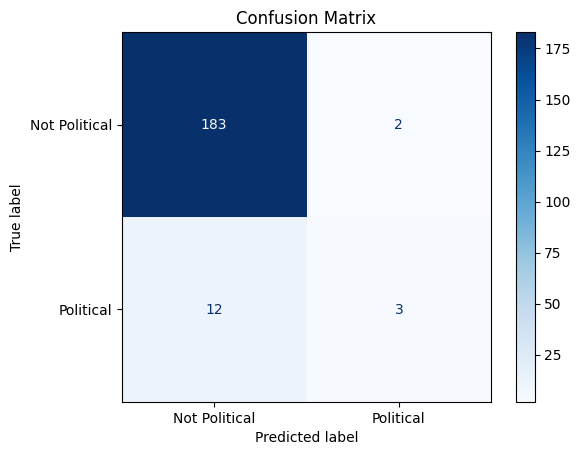

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Political', 'Political'])

# Plot it
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [ ]:
df_output = pd.DataFrame({
    "comment": X_txt_test,
    "gold_label": y_test,
    "prediction": y_pred
})

# Export to CSV
df_output.to_csv("IS6713_Proj_Final_Predictions_Political.csv", index=False)
print("CSV file saved: IS6713_Proj_Final_Predictions_Political.csv")

CSV file saved: IS6713_Proj_Final_Predictions_Political.csv
